<a href="https://colab.research.google.com/github/Rohithkrishnan2105/generative-ai-for-beginners/blob/main/diffusers/in_painting_with_stable_diffusion_using_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-painting pipeline for Stable Diffusion using 🧨 Diffusers

This notebook shows how to do text-guided in-painting with Stable Diffusion model using  🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers).

For a general introduction to the Stable Diffusion model please refer to this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb).

In [2]:
!pip install -qq -U diffusers==0.11.1 transformers ftfy gradio accelerate

To use private and gated models on 🤗 Hugging Face Hub, login is required. If you are only using a public checkpoint (such as `runwayml/stable-diffusion-inpainting` in this notebook), you can skip this step.

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
!git clone https://github.com/huggingface/diffusers.git


fatal: destination path 'diffusers' already exists and is not an empty directory.


In [5]:
# prompt: move to diffusers

%cd diffusers
!pip install -e .


/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.34.0.dev0-0.editable-py3-none-any.whl size=11365 sha256=8f9975ba182afaf3d60046a92954bb97a0d805526992c6e59a67bf6e0a567421
  Stored in directory: /tmp/pip-ephem-wheel-cache-ubr6itfd/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.11.1
    Uninstalling diffusers-0.11.1:
      Successfully uninstalled diffusers-0.11.1


In [6]:
%pwd

'/content/diffusers'

In [17]:
# prompt: come out of a directory

%cd ..


/content


In [7]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [41]:
device = "cuda"
model_path = "stabilityai/stable-diffusion-2-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [37]:
from PIL import Image

# Load the image from a local path
image = Image.open("/content/WhatsApp Image 2025-05-06 at 5.24.28 PM.jpeg").convert("RGB").resize((512, 512))

# Load the mask image from a local path
mask_image = Image.open("/content/mask (1).png").convert("RGB").resize((512, 512))

In [38]:
prompt = "photorealistic, highly detailed image of a pantry with white shelves and light beige walls.  Each cube is a clear, square plastic food storage container with a light gray, airtight lid featuring a silicone valve in the center.The four containers are neatly arranged side-by-side on the center of the top shelf. The style should be clean, minimalist, and organized. Lighting should be bright and even, minimizing shadows. The final result should exhibit high realism and visual clarity, focusing on the texture of the plastic and the details of the lids"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(100) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_samples,
).images

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lighting should be bright and even , minimizing shadows . the final result should exhibit high realism and visual clarity , focusing on the texture of the plastic and the details of the lids']


  0%|          | 0/50 [00:00<?, ?it/s]

In [39]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

In [22]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
from diffusers import StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt

# Define image_grid function to display images in a grid format
def image_grid(images, rows, cols):
  """Displays images in a grid format using Matplotlib."""

  fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Adjust figsize as needed
  for i, ax in enumerate(axes.flat):
      if i < len(images):
          ax.imshow(images[i])
          ax.axis("off")
      else:
          ax.axis("off")  # Hide extra axes if needed

  plt.tight_layout()
  plt.show()

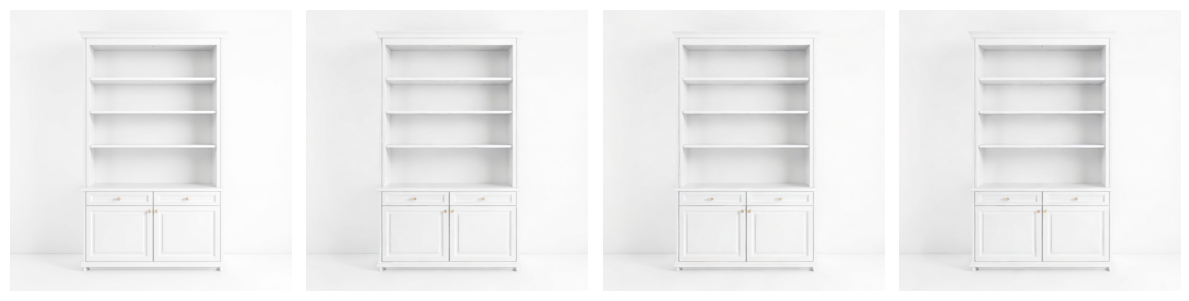

In [40]:
image_grid(images, 1, num_samples + 1)

In [12]:
!pip install --upgrade diffusers

CUDA available: True
CUDA device: Tesla T4
CUDA memory: 15.83 GB


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


xformers not available, using default attention
Original image size: (1024, 1024)
Resized image dimensions: 512x512, padded to (512, 512)



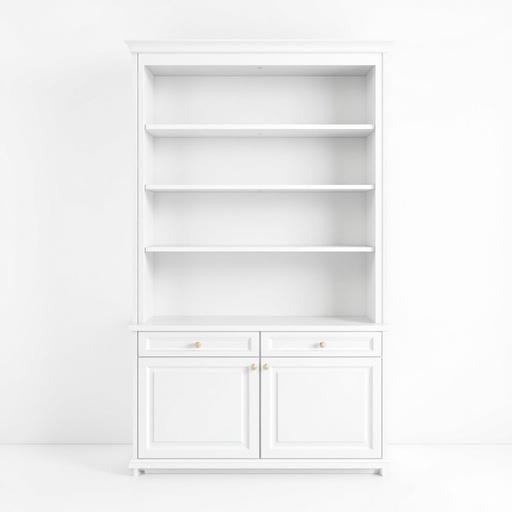

Interface ready. Draw a mask on the image, enter a prompt, and click 'Generate Image'.
Using prompt: Photorealistic image of a white bookshelf with premium clear square acrylic food storage containers with light gray lids
Mask statistics:
Min: 0, Max: 255, Mean: 29.809856414794922
Mask unique values: [  0 255]
White pixels (255): 30645


  0%|          | 0/75 [00:00<?, ?it/s]

Generation complete! Result saved to /content/result.png


In [19]:
import torch
from PIL import Image
import numpy as np
from diffusers import StableDiffusionInpaintPipeline, DDIMScheduler
from IPython.display import display, HTML
import io
import base64
import json
import os
from google.colab import output

# Check CUDA availability and print info for debugging
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# Setup model with optimizations
def setup_model():
    try:
        device = "cuda" if torch.cuda.is_available() else "cpu"

        # Use DDIM scheduler for better quality
        scheduler = DDIMScheduler(
            beta_start=0.00085,
            beta_end=0.012,
            beta_schedule="scaled_linear",
            clip_sample=False,
            set_alpha_to_one=False,
            steps_offset=1,
        )

        # Load the model with optimizations
        pipe = StableDiffusionInpaintPipeline.from_pretrained(
            "stabilityai/stable-diffusion-2-inpainting",
            scheduler=scheduler,
            revision="fp16" if device == "cuda" else None,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32,
            safety_checker=None,  # Disable safety checker for speed
        ).to(device)

        # Memory optimizations
        pipe.enable_attention_slicing()
        if device == "cuda":
            try:
                pipe.enable_xformers_memory_efficient_attention()
                print("Enabled xformers memory efficient attention")
            except:
                print("xformers not available, using default attention")

        return pipe, device
    except Exception as e:
        print(f"Error setting up model: {str(e)}")
        return None, "cpu"

# Load image with proper error handling and aspect ratio preservation
def load_image(image_path, target_size=(512, 512)):
    try:
        # Check if file exists
        if not os.path.exists(image_path):
            print(f"Error: File not found at {image_path}")
            return None

        original_image = Image.open(image_path).convert("RGB")
        print(f"Original image size: {original_image.size}")

        # Calculate aspect ratio for better resizing
        width, height = original_image.size
        aspect_ratio = width / height

        # Resize to fit within 512x512 while maintaining aspect ratio
        if width > height:
            new_width = min(width, target_size[0])
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = min(height, target_size[1])
            new_width = int(new_height * aspect_ratio)

        # Make sure dimensions are even numbers for some models
        new_width = (new_width // 2) * 2
        new_height = (new_height // 2) * 2

        # Resize with high quality
        resized_image = original_image.resize((new_width, new_height), Image.LANCZOS)

        # Create canvas with padding
        canvas = Image.new("RGB", target_size, (255, 255, 255))
        paste_x = (target_size[0] - new_width) // 2
        paste_y = (target_size[1] - new_height) // 2
        canvas.paste(resized_image, (paste_x, paste_y))

        print(f"Resized image dimensions: {new_width}x{new_height}, padded to {target_size}")
        return canvas
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Create the UI with improved mask selection
def create_inpainting_interface(image_path="/content/WhatsApp Image 2025-05-06 at 5.24.28 PM.jpeg"):
    # Set up model and load image
    pipe, device = setup_model()
    if pipe is None:
        display(HTML("<div style='color:red'>Failed to load model. Check console for errors.</div>"))
        return

    # Load and prepare the original image
    original_image = load_image(image_path)
    if original_image is None:
        display(HTML(f"<div style='color:red'>Failed to load image from {image_path}. Check if the path is correct.</div>"))
        return

    # Convert to base64
    buffered = io.BytesIO()
    original_image.save(buffered, format="JPEG", quality=95)
    img_str = base64.b64encode(buffered.getvalue()).decode()

    # Save original image dimensions for reference
    img_width, img_height = original_image.size

    # Create HTML interface
    html = f"""
    <div style="text-align: center; max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif;">
      <h2>Precise Mask Generation Tool</h2>

      <div style="position: relative; width: {img_width}px; height: {img_height}px; margin: 0 auto; border: 2px solid #333; touch-action: none;">
        <img id="sourceImage" src="data:image/jpeg;base64,{img_str}" width="{img_width}" height="{img_height}" style="position: absolute; top: 0; left: 0;">
        <canvas id="maskCanvas" width="{img_width}" height="{img_height}" style="position: absolute; top: 0; left: 0; cursor: crosshair;"></canvas>
      </div>

      <div style="margin: 15px 0; display: flex; justify-content: center; gap: 10px;">
        <div>
          <label for="brushSize">Brush Size: </label>
          <input type="range" id="brushSize" min="5" max="50" value="20" style="vertical-align: middle;">
          <span id="brushSizeValue">20px</span>
        </div>

        <div>
          <label for="brushHardness">Hardness: </label>
          <input type="range" id="brushHardness" min="0" max="100" value="80" style="vertical-align: middle;">
          <span id="brushHardnessValue">80%</span>
        </div>

        <button id="undoBtn" style="padding: 5px 10px;">Undo</button>
        <button id="clearBtn" style="padding: 5px 10px;">Clear Mask</button>
      </div>

      <div style="margin: 10px 0;">
        <input type="text" id="promptInput" placeholder="Enter your prompt here" style="width: 70%; padding: 8px; margin-right: 10px;">
        <button id="generateBtn" style="padding: 8px 15px; background-color: #4CAF50; color: white; border: none; border-radius: 4px; cursor: pointer;">Generate Image</button>
      </div>

      <div style="margin: 20px 0; font-size: 14px; color: #555; text-align: left; padding: 0 20px;">
        <p><strong>Instructions:</strong></p>
        <ul>
          <li>Paint over the areas you want to modify (white areas will be inpainted)</li>
          <li>Adjust brush size and hardness for precise control</li>
          <li>Enter a detailed prompt describing what should replace the masked area</li>
          <li>For best results, make sure your mask has clear edges</li>
        </ul>
      </div>

      <div id="result" style="margin-top: 20px;"></div>
      <div id="statusMessage" style="margin-top: 10px; color: #0066cc;"></div>
    </div>

    <script>
      (function() {{
        const canvas = document.getElementById('maskCanvas');
        const ctx = canvas.getContext('2d');
        const brushSize = document.getElementById('brushSize');
        const brushSizeValue = document.getElementById('brushSizeValue');
        const brushHardness = document.getElementById('brushHardness');
        const brushHardnessValue = document.getElementById('brushHardnessValue');
        const undoBtn = document.getElementById('undoBtn');
        const clearBtn = document.getElementById('clearBtn');
        const generateBtn = document.getElementById('generateBtn');
        const promptInput = document.getElementById('promptInput');
        const statusMessage = document.getElementById('statusMessage');

        // Set default prompt
        promptInput.value = "Photorealistic image of a white bookshelf with premium clear square acrylic food storage containers with light gray lids";

        // Initialize drawing state
        let isDrawing = false;
        let lastX = 0;
        let lastY = 0;
        ctx.fillStyle = 'white';
        ctx.strokeStyle = 'white';
        ctx.lineJoin = 'round';
        ctx.lineCap = 'round';

        // History for undo functionality
        const history = [];
        saveState();

        // Update brush size display
        brushSize.addEventListener('input', function() {{
          brushSizeValue.textContent = this.value + 'px';
        }});

        // Update brush hardness display
        brushHardness.addEventListener('input', function() {{
          brushHardnessValue.textContent = this.value + '%';
        }});

        // Save the current state of the canvas
        function saveState() {{
          history.push(ctx.getImageData(0, 0, canvas.width, canvas.height));
          // Limit history size to prevent memory issues
          if (history.length > 20) {{
            history.shift();
          }}
        }}

        // Undo last action
        undoBtn.addEventListener('click', function() {{
          if (history.length > 1) {{
            history.pop(); // Remove current state
            ctx.putImageData(history[history.length - 1], 0, 0);
          }} else {{
            ctx.clearRect(0, 0, canvas.width, canvas.height);
          }}
        }});

        // Clear the canvas
        clearBtn.addEventListener('click', function() {{
          ctx.clearRect(0, 0, canvas.width, canvas.height);
          history.length = 0; // Clear history
          saveState(); // Save empty state
        }});

        // Start drawing
        function startDrawing(e) {{
          isDrawing = true;
          [lastX, lastY] = getMousePos(canvas, e);
          draw(e); // Draw a dot on click
        }}

        // Draw on the canvas
        function draw(e) {{
          if (!isDrawing) return;

          ctx.globalAlpha = brushHardness.value / 100;
          ctx.lineWidth = brushSize.value;

          ctx.beginPath();

          // Get current mouse position
          const [currentX, currentY] = getMousePos(canvas, e);

          // Start from the previous position
          ctx.moveTo(lastX, lastY);

          // Draw line to current position
          ctx.lineTo(currentX, currentY);
          ctx.stroke();

          // Update last position
          [lastX, lastY] = [currentX, currentY];
        }}

        // Stop drawing
        function stopDrawing() {{
          if (isDrawing) {{
            isDrawing = false;
            saveState();
          }}
        }}

        // Helper function to get mouse position
        function getMousePos(canvas, evt) {{
          const rect = canvas.getBoundingClientRect();
          return [
            (evt.clientX - rect.left) / (rect.right - rect.left) * canvas.width,
            (evt.clientY - rect.top) / (rect.bottom - rect.top) * canvas.height
          ];
        }}

        // Handle touch events
        function handleTouch(e) {{
          e.preventDefault();
          const touch = e.touches[0];
          const mouseEvent = new MouseEvent("mousemove", {{
            clientX: touch.clientX,
            clientY: touch.clientY
          }});
          draw(mouseEvent);
        }}

        // Mouse event listeners
        canvas.addEventListener('mousedown', startDrawing);
        canvas.addEventListener('mousemove', draw);
        canvas.addEventListener('mouseup', stopDrawing);
        canvas.addEventListener('mouseout', stopDrawing);

        // Touch event listeners for mobile
        canvas.addEventListener('touchstart', function(e) {{
          e.preventDefault();
          const touch = e.touches[0];
          const mouseEvent = new MouseEvent("mousedown", {{
            clientX: touch.clientX,
            clientY: touch.clientY
          }});
          startDrawing(mouseEvent);
        }});
        canvas.addEventListener('touchmove', handleTouch);
        canvas.addEventListener('touchend', stopDrawing);

        // Generate button click handler
        generateBtn.addEventListener('click', function() {{
          // Check if mask is empty
          const imageData = ctx.getImageData(0, 0, canvas.width, canvas.height);
          const data = imageData.data;
          let hasContent = false;

          for (let i = 0; i < data.length; i += 4) {{
            if (data[i] > 0 || data[i+1] > 0 || data[i+2] > 0 || data[i+3] > 0) {{
              hasContent = true;
              break;
            }}
          }}

          if (!hasContent) {{
            statusMessage.textContent = "Please draw a mask first (white areas will be replaced)";
            return;
          }}

          if (!promptInput.value.trim()) {{
            statusMessage.textContent = "Please enter a prompt describing what should replace the masked area";
            return;
          }}

          // Get the mask image as base64
          const maskDataUrl = canvas.toDataURL('image/png');
          const maskBase64 = maskDataUrl.split(',')[1];

          // Show loading message
          statusMessage.textContent = "Generating image... This may take up to a minute.";
          generateBtn.disabled = true;

          // Send mask and prompt to Python
          google.colab.kernel.invokeFunction('notebook.process_mask', [maskBase64, promptInput.value], {{}});
        }});
      }})();
    </script>
    """

    display(HTML(html))

    # Function to process mask and generate image
    def process_mask(mask_b64, prompt):
        try:
            # Convert base64 mask to image
            mask_bytes = base64.b64decode(mask_b64)
            mask_buffer = io.BytesIO(mask_bytes)
            mask_image = Image.open(mask_buffer).convert('L')  # Convert to grayscale

            # Create inverted mask (white areas will be inpainted)
            mask_np = np.array(mask_image)
            mask_np = np.where(mask_np > 0, 255, 0)  # Make mask binary for better results
            mask_image = Image.fromarray(mask_np.astype(np.uint8))

            # Use default prompt if empty
            if not prompt or prompt.strip() == "":
                prompt = "Photorealistic image of a white bookshelf with premium clear square acrylic food storage containers with light gray lids"

            print(f"Using prompt: {prompt}")

            # Debug mask
            print("Mask statistics:")
            mask_array = np.array(mask_image)
            print(f"Min: {mask_array.min()}, Max: {mask_array.max()}, Mean: {mask_array.mean()}")
            print(f"Mask unique values: {np.unique(mask_array)}")
            print(f"White pixels (255): {np.sum(mask_array == 255)}")

            # Make mask more aggressive (ensure it's fully white where needed)
            # Threshold at 128 - anything above becomes 255, anything below becomes 0
            mask_array = np.where(mask_array > 128, 255, 0).astype(np.uint8)
            mask_image = Image.fromarray(mask_array)

            # Generate image with improved parameters
            generator = torch.Generator(device=device).manual_seed(42)  # For reproducibility
            result = pipe(
                prompt=prompt,
                image=original_image,
                mask_image=mask_image,
                guidance_scale=9.0,  # Higher value for more prompt adherence
                num_inference_steps=75,  # Higher for better quality
                generator=generator,
            ).images[0]

            # Save result
            result_path = "/content/result.png"
            result.save(result_path, format="PNG", quality=95)

            # Convert result to base64
            result_buffer = io.BytesIO()
            result.save(result_buffer, format="JPEG", quality=95)
            result_str = base64.b64encode(result_buffer.getvalue()).decode()

            # Convert mask to viewable format
            mask_display = io.BytesIO()
            mask_image.save(mask_display, format="PNG")
            mask_display_str = base64.b64encode(mask_display.getvalue()).decode()

            # Display results with comparison
            display_html = f"""
            <div style="display: flex; justify-content: space-between; flex-wrap: wrap; max-width: 1200px; margin: 0 auto;">
              <div style="text-align: center; margin: 10px;">
                <img src="data:image/jpeg;base64,{img_str}" width="400">
                <p>Original Image</p>
              </div>
              <div style="text-align: center; margin: 10px;">
                <img src="data:image/png;base64,{mask_display_str}" width="400">
                <p>Mask (white areas were modified)</p>
              </div>
              <div style="text-align: center; margin: 10px;">
                <img src="data:image/jpeg;base64,{result_str}" width="400">
                <p>Result</p>
              </div>
            </div>
            <div style="text-align: center; margin-top: 15px;">
              <p>Result saved as: <code>{result_path}</code></p>
              <p><a href="data:image/jpeg;base64,{result_str}" download="result.jpg">Click here to download result</a></p>
            </div>
            """

            # Update status
            status_js = f"""
            document.getElementById('result').innerHTML = {json.dumps(display_html)};
            document.getElementById('statusMessage').textContent = "Generation complete!";
            document.getElementById('generateBtn').disabled = false;
            """
            output.eval_js(status_js)

            print(f"Generation complete! Result saved to {result_path}")

        except Exception as e:
            import traceback
            error_details = traceback.format_exc()
            print(f"Error processing mask: {str(e)}")
            print(error_details)

            error_message = f"""
            <div style="color: red; text-align: left; padding: 10px; border: 1px solid red; margin-top: 20px;">
              <p><strong>Error occurred during image generation:</strong></p>
              <p>{str(e)}</p>
              <p>Check the console output for more details.</p>
            </div>
            """

            # Update status with error
            error_js = f"""
            document.getElementById('result').innerHTML = {json.dumps(error_message)};
            document.getElementById('statusMessage').textContent = "Error occurred during generation.";
            document.getElementById('generateBtn').disabled = false;
            """
            output.eval_js(error_js)

    # Register the callback
    output.register_callback("notebook.process_mask", process_mask)
    print("Interface ready. Draw a mask on the image, enter a prompt, and click 'Generate Image'.")

# Run the interface
def run_inpainting(image_path=None):
    if image_path is None:
        # Try to find an image in the current directory
        import glob
        image_files = glob.glob('/content/*.jpg') + glob.glob('/content/*.jpeg') + glob.glob('/content/*.png')
        if image_files:
            image_path = image_files[0]
            print(f"Using found image: {image_path}")
        else:
            image_path = input("Enter the path to your image file: ")

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at '{image_path}'")
        print("Please upload an image to Colab first, then provide the correct path.")
        return

    # Create the interface
    create_inpainting_interface(image_path)

# Example usage
image_path = "/content/WhatsApp Image 2025-05-06 at 5.24.28 PM.jpeg"
run_inpainting(image_path)  # Run with your image path